# Loopless FBA

The goal of this procedure is identification of a thermodynamically consistent flux state without loops, as implied by the name. You can find a more detailed description in the [method](#Method) section at the end of the notebook.

In [1]:
%matplotlib inline
import plot_helper

import cobra.io
from cobra import Reaction, Metabolite, Model
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

## Loopless solution

Classical loopless approaches as described below are computationally expensive to solve due to the added mixed-integer constraints. A much faster, and pragmatic approach is instead to post-process flux distributions to simply set fluxes to zero wherever they can be zero without changing the fluxes of any exchange reactions in the model. [CycleFreeFlux](http://dx.doi.org/10.1093/bioinformatics/btv096) is an algorithm that can be used to achieve this and in cobrapy it is implemented in the `cobra.flux_analysis.loopless_solution` function. `loopless_solution` will identify the closest flux distribution (using only loopless elementary flux modes) to the original one. Note that this will not remove loops which you explicitly requested, for instance by forcing a loop reaction to carry non-zero flux. 

Using a larger model than the simple example above, this can be demonstrated as follows

In [2]:
salmonella = cobra.io.load_model('salmonella')
nominal = salmonella.optimize()
loopless = loopless_solution(salmonella)

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcaACP_c "Decanoyl-ACP-n-C100ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcaACP_c "Decanoyl-ACP-n-C100ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2aobut_c "L-2-Amino-3-oxobutanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2aobut_c "L-2-Amino-3-oxobutanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2pglyc_c "2-Phosphoglycolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2pglyc_c "2-Phosphoglycolate">
Use of the species charge attribute is disco

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arbt6p_c "Arbutin-6-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2agpe180_c "2-Acyl-sn-glycero-3-phosphoethanolamine-n-C180">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2agpe180_c "2-Acyl-sn-glycero-3-phosphoethanolamine-n-C180">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_uamag_c "UDP-N-acetylmuramoyl-L-alanyl-D-glutamate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_uamag_c "UDP-N-acetylmuramoyl-L-alanyl-D-glutamate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pmcoa_c "Pimeloyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pmcoa_c "Pimeloyl-CoA">
Use of the species charge attribute is discoura

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_anhgm_e "N-Acetyl-D-glucosamine-anhydrous-N-Acetylmuramic-acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_p "UMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ump_p "UMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_coa_c "Coenzyme-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_coa_c "Coenzyme-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_anhgm_c "N-Acetyl-D-glucosamine-anhydrous-N-Acetylmuramic-acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_anhgm_c "N-Acetyl-D-glucosamine-anhydrous-N-Acetylmuramic-acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_LalaDgl

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ascb6p_c "L-ascorbate-6-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lipa_c "KDO-2-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lipa_c "KDO-2-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cbp_c "Carbamoyl-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cbp_c "Carbamoyl-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_arbtn_e "aerobactin-minus-Fe3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arbtn_e "aerobactin-minus-Fe3">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_asn__L_c "L-Asparagine">
Use of FORMULA in the notes element i

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ura_p "Uracil">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_kdo2lipid4p_c "KDO-2-lipid-IV-A-with-palmitoleoyl">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_kdo2lipid4p_c "KDO-2-lipid-IV-A-with-palmitoleoyl">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc_p "Glycerol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc_p "Glycerol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chit6p_c "chit6p_c">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tre_p "Trehalose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tre_p "Trehalose">
Use of the species charge attribute is discouraged,

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xmp_c "Xanthosine-5-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xmp_c "Xanthosine-5-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xmp_e "Xanthosine-5-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xmp_e "Xanthosine-5-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mg2_p "magnesium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mg2_p "magnesium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xmp_p "Xanthosine-5-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xmp_p "Xanthosine-5-phosphate">
Use of the species charge attribute is

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3c3hmp_c "3-Carboxy-3-hydroxy-4-methylpentanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3c3hmp_c "3-Carboxy-3-hydroxy-4-methylpentanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ddcacoa_c "Dodecanoyl-CoA-n-C120CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ddcacoa_c "Dodecanoyl-CoA-n-C120CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_12ppd__S_e "S-Propane-1-2-diol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_12ppd__S_e "S-Propane-1-2-diol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_12ppd__S_c "S-Propane-1-2-diol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <S

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xan_c "Xanthine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xan_c "Xanthine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pheme_p "Protoheme">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pheme_p "Protoheme">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_salchsx_p "Salmochelin-SX">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_salchsx_p "Salmochelin-SX">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_6hmhpt_c "6-hydroxymethyl-dihydropterin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6hmhpt_c "6-hydroxymethyl-dihydropterin">
Use of the species charge attribute is discouraged

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_oxam_c "Oxamate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_oxam_c "Oxamate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_malACP_c "Malonyl-acyl-carrier-protein">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malACP_c "Malonyl-acyl-carrier-protein">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fuc__L_p "L-Fucose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fuc__L_p "L-Fucose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_uaagmda_c "Undecaprenyl-diphospho-N-acetylmuramoyl-N-acetylglucosamine-L-ala-D-glu-meso-2-6-diaminopimeloyl-D-ala-D-ala">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instea

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dtdp4d6dg_c "dTDP-4-dehydro-6-deoxy-D-glucose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dtdp4d6dg_c "dTDP-4-dehydro-6-deoxy-D-glucose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_halipa_e "hepta-acylated-KDO-2-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_halipa_e "hepta-acylated-KDO-2-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cdpabeq_c "CDP-abequose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cdpabeq_c "CDP-abequose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_psd5p_c "psd5p_c">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_eca4colipa_p "enterobacteria

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h_c "H">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_15dap_c "1-5-Diaminopentane">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_15dap_c "1-5-Diaminopentane">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2amsa_c "2-Aminomalonate-semialdehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2amsa_c "2-Aminomalonate-semialdehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_salchs4_e "Salmochelin-S4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_salchs4_e "Salmochelin-S4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lcts_p "Lactose">
Use of FORMULA in the notes element is discou

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_r5p_p "alpha-D-Ribose-5-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23cgmp_e "2-3-Cyclic-GMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_23cgmp_e "2-3-Cyclic-GMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fum_p "Fumarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fum_p "Fumarate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_udcdpgalrmn_c "Undecaprenyl-diphosphate-galactose-rhamnose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_udcdpgalrmn_c "Undecaprenyl-diphosphate-galactose-rhamnose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23cgmp_p "2-3-Cyclic

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_urdglyc_c "--Ureidoglycolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ocdca_p "octadecanoate-n-C180">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ocdca_p "octadecanoate-n-C180">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ile__L_c "L-Isoleucine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ile__L_c "L-Isoleucine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chitob_e "Chitobiose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chitob_e "Chitobiose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cobn_c "Cobyrinate">
Use of FORMULA in the notes element is discouraged, use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_uama_c "UDP-N-acetylmuramoyl-L-alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_uama_c "UDP-N-acetylmuramoyl-L-alanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ptrc_e "Putrescine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptrc_e "Putrescine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glu__L_c "L-Glutamate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glu__L_c "L-Glutamate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glu__L_e "L-Glutamate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glu__L_e "L-Glutamate">
Use of the species charge attribute is discourag

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydxn_c "Pyridoxine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_12dgr2_ST_p "12dgr2_ST_p">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cit_e "Citrate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cit_e "Citrate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cdpdodecg_c "CDP-1-2-dioctadecanoylglycerol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cdpdodecg_c "CDP-1-2-dioctadecanoylglycerol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cit_c "Citrate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cit_c "Citrate">
Use of the species charge attribute is discouraged, use fbc

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acon__C_p "cis-Aconitate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_rml1p_c "L-Rhamnulose-1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_rml1p_c "L-Rhamnulose-1-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lyx__L_p "L-Lyxose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lyx__L_p "L-Lyxose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_12dgr181_p "1-2-Diacyl-sn-glycerol-dioctadec-11-enoyl-n-C181">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_12dgr181_p "1-2-Diacyl-sn-glycerol-dioctadec-11-enoyl-n-C181">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_p

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_clpn181_p "cardiolipin-tetraoctadec-11-enoyl-n-C181">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_clpn181_p "cardiolipin-tetraoctadec-11-enoyl-n-C181">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3c4mop_c "3-Carboxy-4-methyl-2-oxopentanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3c4mop_c "3-Carboxy-4-methyl-2-oxopentanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gmhep1p_c "D-Glycero-D-manno-heptose-1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gmhep1p_c "D-Glycero-D-manno-heptose-1-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2shchc_c "2-Succinyl-6-hydroxy-2-4-cyclohexadiene-1-carboxyl

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lipa__cold_p "cold-adapted-KDO-2-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lipa__cold_p "cold-adapted-KDO-2-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1hdec9eg3p_c "1-hexadec-9-enoyl-sn-glycerol-3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1hdec9eg3p_c "1-hexadec-9-enoyl-sn-glycerol-3-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lipa__cold_e "cold-adapted-KDO-2-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lipa__cold_e "cold-adapted-KDO-2-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ump_e "3-UMP">
Use of FORMULA in the notes element is discouraged, use fbc:

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23dhbzs3_e "23dhbzs3_e">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_trnaala_c "tRNA-Ala">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trnaala_c "tRNA-Ala">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_crncoa_c "L-Carnitinyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_crncoa_c "L-Carnitinyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_indole_p "Indole">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_indole_p "Indole">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ocvac11eACP_c "3-oxo-cis-vacc-11-enoyl-acyl-carrier-protein">
Use of FORMULA in the notes element is discourage

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_34dhpacet_c "3-4-Dihydroxyphenylacetate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_34dhpacet_c "3-4-Dihydroxyphenylacetate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_udcpp_c "Undecaprenyl-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_udcpp_c "Undecaprenyl-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nmn_p "NMN">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nmn_p "NMN">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_anth_c "Anthranilate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_anth_c "Anthranilate">
Use of the species charge attribute is disco

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_metsox__R__L_e "L-methionine-R-sulfoxide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tmao_p "Trimethylamine-N-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tmao_p "Trimethylamine-N-oxide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pa161_c "1-2-dihexadec-9-enoyl-sn-glycerol-3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pa161_c "1-2-dihexadec-9-enoyl-sn-glycerol-3-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nad_c "Nicotinamide-adenine-dinucleotide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nad_c "Nicotinamide-adenine-dinucleotide">
Use of the species charge attribute is discour

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe140_p "phosphatidylethanolamine-ditetradecanoyl-n-C140">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1agpg141_p "1-Acyl-sn-glycero-3-phosphoglycerol-n-C141">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1agpg141_p "1-Acyl-sn-glycero-3-phosphoglycerol-n-C141">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acmana_p "N-Acetyl-D-mannosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acmana_p "N-Acetyl-D-mannosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_frulys_e "fructoselysine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_frulys_e "fructoselysine">
Use of the species charge attribute is discouraged, use fb

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3opalmACP_c "3-Oxohexadecanoyl-acyl-carrier-protein">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_agm_c "Agmatine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_agm_c "Agmatine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_agm_e "Agmatine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_agm_e "Agmatine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hlipa_c "heptosyl-kdo2-lipidA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hlipa_c "heptosyl-kdo2-lipidA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xylu__L_p "L-Xylulose">
Use of FORMULA in the notes element is discouraged, us

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sucorn_c "N2-Succinyl-L-ornithine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sucorn_c "N2-Succinyl-L-ornithine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cdpdhdecg_c "CDP-1-2-dihexadecanoylglycerol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cdpdhdecg_c "CDP-1-2-dihexadecanoylglycerol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_rml_c "L-Rhamnulose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_rml_c "L-Rhamnulose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2agpg140_p "2-Acyl-sn-glycero-3-phosphoglycerol-n-C140">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2ag

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acetol_c "Acetol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gcald_c "Glycolaldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gcald_c "Glycolaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mso3_p "methanesulfonate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mso3_p "methanesulfonate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_trnaasn_c "tRNA-Asn">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trnaasn_c "tRNA-Asn">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tton_p "tton_p">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Speci

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gmhep17bp_c "D-Glycero-D-manno-heptose-1-7-bisphosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gmhep17bp_c "D-Glycero-D-manno-heptose-1-7-bisphosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tungs_e "tungstate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tungs_e "tungstate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thr__L_p "L-Threonine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thr__L_p "L-Threonine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hpppn_e "3-3-hydroxy-phenyl-propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hpppn_e "3-3-hydrox

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_amp_p "AMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_amp_p "AMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ohcoa_c "3-Oxohexanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ohcoa_c "3-Oxohexanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2dhglcn_c "2-Dehydro-D-gluconate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2dhglcn_c "2-Dehydro-D-gluconate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glx_c "Glyoxylate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glx_c "Glyoxylate">
Use of the species charge attribute is discouraged, use fbc:charge inste

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ahcys_c "S-Adenosyl-L-homocysteine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ahcys_c "S-Adenosyl-L-homocysteine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dump_p "dUMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dump_p "dUMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3oocoa_c "3-Oxooctanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3oocoa_c "3-Oxooctanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acnam_c "N-Acetylneuraminate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acnam_c "N-Acetylneuraminate">
Use of the species charge attribute is dis

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ap5a_c "P1-P5-Bis-5-adenosyl-pentaphosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23cump_p "2-3-Cyclic-UMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_23cump_p "2-3-Cyclic-UMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dttp_c "dTTP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dttp_c "dTTP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hhlipa_c "heptosyl-heptosyl-kdo2-lipidA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hhlipa_c "heptosyl-heptosyl-kdo2-lipidA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_alac__S_c "S-2-Acetolactate">
Use of FORMULA in the no

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_uacgam_p "UDP-N-acetyl-D-glucosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_uacgam_p "UDP-N-acetyl-D-glucosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_rhcys_c "S-Ribosyl-L-homocysteine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_rhcys_c "S-Ribosyl-L-homocysteine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_anhgm3p_c "N-Acetyl-D-glucosamine-anhydrous-N-Acetylmuramyl-tripeptide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_anhgm3p_c "N-Acetyl-D-glucosamine-anhydrous-N-Acetylmuramyl-tripeptide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cyan_e "Hydrogen-cyanide">
Use of FORMULA in the notes element is di

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_udpgal_e "UDPgalactose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acac_p "Acetoacetate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acac_p "Acetoacetate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adprib_c "ADPribose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adprib_c "ADPribose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_t3c7mrseACP_c "trans-3-cis-7-myristoleoyl-acyl-carrier-protein">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_t3c7mrseACP_c "trans-3-cis-7-myristoleoyl-acyl-carrier-protein">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adcobn_c "Adenosylcobyr

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_s7p_c "Sedoheptulose-7-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_peamn_e "Phenethylamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_peamn_e "Phenethylamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_taur_p "Taurine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_taur_p "Taurine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lys__L_e "L-Lysine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lys__L_e "L-Lysine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2odec11eg3p_p "2-octadec-11-enoyl-sn-glycerol-3-phosphate">
Use of FORMULA in the notes element is disc

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_duri_e "Deoxyuridine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tmrs2eACP_c "trans-Tetradec-2-enoyl-acyl-carrier-protein">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tmrs2eACP_c "trans-Tetradec-2-enoyl-acyl-carrier-protein">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23dhbzs_c "2-3-dihydroxybenzoylserine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_23dhbzs_c "2-3-dihydroxybenzoylserine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_duri_c "Deoxyuridine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_duri_c "Deoxyuridine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_t

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_um4p_c "UDP-N-acetylmuramoyl-L-alanyl-D-gamma-glutamyl-meso-2-6-diaminopimelate-D-alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_um4p_c "UDP-N-acetylmuramoyl-L-alanyl-D-gamma-glutamyl-meso-2-6-diaminopimelate-D-alanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_foam_c "Formamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_foam_c "Formamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_f6p_p "D-Fructose-6-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_f6p_p "D-Fructose-6-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_foam_e "Formamide">
Use of FORMULA in the notes element is discouraged, use 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fe3hox_p "Fe-III-hydroxamate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_d5kg_c "d5kg_c">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_skm5p_c "Shikimate-5-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_skm5p_c "Shikimate-5-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_udcdp13Oag_p "Undecaprenyl-diphosphate-O-antigene-13x">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_udcdp13Oag_p "Undecaprenyl-diphosphate-O-antigene-13x">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acACP_c "Acetyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acACP_c "Acetyl-ACP"

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cobalt2_p "Co2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cobalt2_p "Co2">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lpp_sp_p "lpp_sp_p">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hphhlipa_c "heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hphhlipa_c "heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser__D_p "D-Serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ser__D_p "D-Serine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cgly_p "Cys-Gly">
Use of FORMULA in the notes element is d

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pe120_p "phosphatidylethanolamine-didodecanoyl-n-C120">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe120_p "phosphatidylethanolamine-didodecanoyl-n-C120">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ru5p__D_c "D-Ribulose-5-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ru5p__D_c "D-Ribulose-5-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3odcoa_c "3-Oxodecanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3odcoa_c "3-Oxodecanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4r5au_c "4-1-D-Ribitylamino-5-aminouracil">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glc__D_c "D-Glucose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glc__D_e "D-Glucose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glc__D_e "D-Glucose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2agpg160_c "2-Acyl-sn-glycero-3-phosphoglycerol-n-C160">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2agpg160_c "2-Acyl-sn-glycero-3-phosphoglycerol-n-C160">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sulfac_p "sulfoacetate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sulfac_p "sulfoacetate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_frdp_c "Farnesyl-diphosphate">
Use of 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_etha_e "Ethanolamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_feroxGfe_e "Ferrioxamine-G-fe">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_feroxGfe_e "Ferrioxamine-G-fe">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_eca3und_p "enterobacterial-common-antigen-x3-undecaprenyl-diphosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_eca3und_p "enterobacterial-common-antigen-x3-undecaprenyl-diphosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gam_e "D-Glucosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gam_e "D-Glucosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <S

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_btcoa_c "Butanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_LalaLglu_c "L-alanine-L-glutamate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_LalaLglu_c "L-alanine-L-glutamate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23ccmp_e "2-3-Cyclic-CMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_23ccmp_e "2-3-Cyclic-CMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_argtrna_c "L-Arginyl-tRNA-Arg">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_argtrna_c "L-Arginyl-tRNA-Arg">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23ccmp_p "2-3-Cyclic-CMP">
Use of FORMULA in the notes

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mdr1p_c "5-Methylthio-5-deoxy-D-ribose-1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mdr1p_c "5-Methylthio-5-deoxy-D-ribose-1-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ca2_p "Calcium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ca2_p "Calcium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tyr__L_c "L-Tyrosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tyr__L_c "L-Tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2agpe140_p "2-Acyl-sn-glycero-3-phosphoethanolamine-n-C140">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2agpe140_p "2-Acyl-

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgal1p_p "N-Acetyl-D-galactosamine-1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgal1p_p "N-Acetyl-D-galactosamine-1-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xyl__D_p "D-Xylose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xyl__D_p "D-Xylose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_g3pg_c "Glycerophosphoglycerol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g3pg_c "Glycerophosphoglycerol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_rmn_p "L-Rhamnose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_rmn_p "L-Rhamnose">
Use of the species c

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_so3_c "Sulfite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_so3_e "Sulfite">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_so3_e "Sulfite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dha_e "Dihydroxyacetone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dha_e "Dihydroxyacetone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dha_c "Dihydroxyacetone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dha_c "Dihydroxyacetone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_peptido_ST_p "peptido_ST_p">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mn2_e "Mn2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mn2_e "Mn2">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgal_e "N-Acetyl-D-galactosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgal_e "N-Acetyl-D-galactosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_so4_c "Sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_so4_c "Sulfate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_23dhbzs2_c "23dhbzs2_c">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hmbil_c "Hydroxymethylbilane">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Spe

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2ddecg3p_c "2-dodecanoyl-sn-glycerol-3-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_unagamuf_c "Undecaprenyl-diphospho-N-acetylglucosamine-N-acetylmannosaminuronate-N-acetamido-4-6-dideoxy-D-galactose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_unagamuf_c "Undecaprenyl-diphospho-N-acetylglucosamine-N-acetylmannosaminuronate-N-acetamido-4-6-dideoxy-D-galactose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_unagamuf_p "Undecaprenyl-diphospho-N-acetylglucosamine-N-acetylmannosaminuronate-N-acetamido-4-6-dideoxy-D-galactose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_unagamuf_p "Undecaprenyl-diphospho-N-acetylglucosamine-N-acetylmannosaminuronate-N-acetamido-4-6-dideoxy-D-galactose">
Use of the 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2pg_c "D-Glycerate-2-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2pg_c "D-Glycerate-2-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hhcoa_c "S-3-Hydroxyhexanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hhcoa_c "S-3-Hydroxyhexanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ggagicolipa_c "glucosyl-galactosyl-glucosyl-inner-core-oligosaccharide-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ggagicolipa_c "glucosyl-galactosyl-glucosyl-inner-core-oligosaccharide-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ttdcea_p "tetradecenoate-n-C141">
Use of FORMULA in the notes el

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_apg140_c "acyl-phosphatidylglycerol-n-C140">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_apg140_c "acyl-phosphatidylglycerol-n-C140">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ribflv_c "Riboflavin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ribflv_c "Riboflavin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_rbflvrd_c "Reduced-riboflavin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_rbflvrd_c "Reduced-riboflavin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gal__bD_p "beta-D-Galactose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gal__bD_p "beta-D-Galactose">
Use of t

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mana_c "D-Mannonate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_manglyc_e "2-alpha-D-Mannosyl-D-glycerate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_manglyc_e "2-alpha-D-Mannosyl-D-glycerate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hocoa_c "S-3-Hydroxyoctanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hocoa_c "S-3-Hydroxyoctanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ps140_c "phosphatidylserine-ditetradecanoyl-n-C140">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ps140_c "phosphatidylserine-ditetradecanoyl-n-C140">
Use of the species charge attribute is discouraged, use fbc:charge 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_feroxG_e "Ferrioxamine-G">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_rib__D_p "D-Ribose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_rib__D_p "D-Ribose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no_e "Nitric-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_no_e "Nitric-oxide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dimp_c "dIMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dimp_c "dIMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dimp_e "dIMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dimp_e "dIMP">
U

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adocbl_c "Adenosylcobalamin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adocbl_e "Adenosylcobalamin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adocbl_e "Adenosylcobalamin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_leu__L_p "L-Leucine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leu__L_p "L-Leucine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2agpg181_p "2-Acyl-sn-glycero-3-phosphoglycerol-n-C181">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2agpg181_p "2-Acyl-sn-glycero-3-phosphoglycerol-n-C181">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adocbl_p "Adenosylco

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_butACP_c "Butyryl-ACP-n-C40ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_salchs2fe_p "salchs2fe_p">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fgam_c "N2-Formyl-N1-5-phospho-D-ribosyl-glycinamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fgam_c "N2-Formyl-N1-5-phospho-D-ribosyl-glycinamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_salchs2fe_e "salchs2fe_e">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_salchs2fe_c "salchs2fe_c">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_malthx_e "Maltohexaose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malthx_e "Maltohexaose">
Use

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gbbtn_c "gamma-butyrobetaine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cys__L_p "L-Cysteine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cys__L_p "L-Cysteine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dad__2_p "Deoxyadenosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dad__2_p "Deoxyadenosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ppcoa_c "Propanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppcoa_c "Propanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fe3hox__un_p "Fe-III-hydoxamate-unloaded">
Use of FORMULA in the notes element is disco

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ps181_c "phosphatidylserine-dioctadec-11-enoyl-n-C181">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_colipa20Oag_p "O-antigen-x20-core-oligosaccharide-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_colipa20Oag_p "O-antigen-x20-core-oligosaccharide-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cl_e "Chloride">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cl_e "Chloride">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_asp__L_c "L-Aspartate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asp__L_c "L-Aspartate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_asp__L_e "

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_clpn140_p "cardiolipin-tetratetradecanoyl-n-C140">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_clpn140_p "cardiolipin-tetratetradecanoyl-n-C140">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gthox_c "Oxidized-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gthox_c "Oxidized-glutathione">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydam_c "Pyridoxamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydam_c "Pyridoxamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_imp_e "IMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_imp_e "IMP">
Use of the species charge at

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3c2hmp_c "3-Carboxy-2-hydroxy-4-methylpentanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_enlipa_e "phosphoethanolamine-KDO-2-lipid-A">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_enlipa_e "phosphoethanolamine-KDO-2-lipid-A">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_trnatyr_c "tRNA-Tyr">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trnatyr_c "tRNA-Tyr">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_14glucan_c "1-4-alpha-D-glucan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_14glucan_c "1-4-alpha-D-glucan">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_14glucan_e "1-4

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_oxam_c_boundary "Oxamate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_oxam_c_boundary "Oxamate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chitob_e_boundary "Chitobiose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chitob_e_boundary "Chitobiose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydxn_e_boundary "Pyridoxine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydxn_e_boundary "Pyridoxine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydx_e_boundary "Pyridoxal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydx_e_boundary "Pyridoxal">
Use of the species charge attr

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgal_e_boundary "N-Acetyl-D-galactosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgal_e_boundary "N-Acetyl-D-galactosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgam1p_e_boundary "N-Acetyl-D-glucosamine-1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgam1p_e_boundary "N-Acetyl-D-glucosamine-1-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgam_e_boundary "N-Acetyl-D-glucosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgam_e_boundary "N-Acetyl-D-glucosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acmana_e_boundary "N-Acetyl-D-mannosamine">
Use of FORMULA in the notes el

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ca2_e_boundary "Calcium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ca2_e_boundary "Calcium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cbi_e_boundary "Cobinamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cbi_e_boundary "Cobinamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cbl1_e_boundary "Cob-I-alamin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cbl1_e_boundary "Cob-I-alamin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cd2_e_boundary "Cadmium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cd2_e_boundary "Cadmium">
Use of the species charge attribute is dis

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dha_e_boundary "Dihydroxyacetone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dha_e_boundary "Dihydroxyacetone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dimp_e_boundary "dIMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dimp_e_boundary "dIMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_din_e_boundary "Deoxyinosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_din_e_boundary "Deoxyinosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dms_e_boundary "Dimethyl-sulfide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dms_e_boundary "Dimethyl-sulfide">
Use of the species

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fuc__L_e_boundary "L-Fucose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fuc__L_e_boundary "L-Fucose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fum_e_boundary "Fumarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fum_e_boundary "Fumarate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_g1p_e_boundary "D-Glucose-1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g1p_e_boundary "D-Glucose-1-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_g3pc_e_boundary "sn-Glycero-3-phosphocholine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g3pc_e_boundary "sn-Glycero

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc3p_e_boundary "Glycerol-3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc3p_e_boundary "Glycerol-3-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc__R_e_boundary "R-Glycerate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc__R_e_boundary "R-Glycerate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc_e_boundary "Glycerol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc_e_boundary "Glycerol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyclt_e_boundary "Glycolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyclt_e_boundary "Glycolate"

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lac__D_e_boundary "D-Lactate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lac__D_e_boundary "D-Lactate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lac__L_e_boundary "L-Lactate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lac__L_e_boundary "L-Lactate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lcts_e_boundary "Lactose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lcts_e_boundary "Lactose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_leu__L_e_boundary "L-Leucine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leu__L_e_boundary "L-Leucine">
Use of the species charge at

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nh4_e_boundary "Ammonium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ni2_e_boundary "nickel">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ni2_e_boundary "nickel">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nmn_e_boundary "NMN">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nmn_e_boundary "NMN">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no2_e_boundary "Nitrite">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_no2_e_boundary "Nitrite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no3_e_boundary "Nitrate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalF

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sbt__D_e_boundary "D-Sorbitol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser__D_e_boundary "D-Serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ser__D_e_boundary "D-Serine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser__L_e_boundary "L-Serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ser__L_e_boundary "L-Serine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_skm_e_boundary "Shikimate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_skm_e_boundary "Shikimate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_so2_e_boundary "sulfur-dioxide">
Use of FORMULA in the notes

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_udpgal_e_boundary "UDPgalactose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_udpglcur_e_boundary "UDP-D-glucuronate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_udpglcur_e_boundary "UDP-D-glucuronate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_e_boundary "UMP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ump_e_boundary "UMP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ura_e_boundary "Uracil">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ura_e_boundary "Uracil">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_urea_e_boundary "Urea">
Use of FORMULA in the notes elemen

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_feroxG_e_boundary "Ferrioxamine-G">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_feroxG_e_boundary "Ferrioxamine-G">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_feroxGfe_e_boundary "Ferrioxamine-G-fe">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_feroxGfe_e_boundary "Ferrioxamine-G-fe">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_drib_e_boundary "2-Deoxy-D-ribose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_drib_e_boundary "2-Deoxy-D-ribose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dxyl_e_boundary "dxyl_e">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_salchs2fe_e_boundary "sal

Adding exchange reaction EX_alltn_e_boundary with default bounds for boundary metabolite: alltn_e_boundary.
Adding exchange reaction EX_amp_e_boundary with default bounds for boundary metabolite: amp_e_boundary.
Adding exchange reaction EX_anhgm_e_boundary with default bounds for boundary metabolite: anhgm_e_boundary.
Adding exchange reaction EX_arab__L_e_boundary with default bounds for boundary metabolite: arab__L_e_boundary.
Adding exchange reaction EX_arbtn_e_boundary with default bounds for boundary metabolite: arbtn_e_boundary.
Adding exchange reaction EX_arbtn__fe3_e_boundary with default bounds for boundary metabolite: arbtn__fe3_e_boundary.
Adding exchange reaction EX_arg__L_e_boundary with default bounds for boundary metabolite: arg__L_e_boundary.
Adding exchange reaction EX_ascb__L_e_boundary with default bounds for boundary metabolite: ascb__L_e_boundary.
Adding exchange reaction EX_asn__L_e_boundary with default bounds for boundary metabolite: asn__L_e_boundary.
Adding exc

Adding exchange reaction EX_frulys_e_boundary with default bounds for boundary metabolite: frulys_e_boundary.
Adding exchange reaction EX_fruur_e_boundary with default bounds for boundary metabolite: fruur_e_boundary.
Adding exchange reaction EX_fuc__L_e_boundary with default bounds for boundary metabolite: fuc__L_e_boundary.
Adding exchange reaction EX_fum_e_boundary with default bounds for boundary metabolite: fum_e_boundary.
Adding exchange reaction EX_g1p_e_boundary with default bounds for boundary metabolite: g1p_e_boundary.
Adding exchange reaction EX_g3pc_e_boundary with default bounds for boundary metabolite: g3pc_e_boundary.
Adding exchange reaction EX_g3pe_e_boundary with default bounds for boundary metabolite: g3pe_e_boundary.
Adding exchange reaction EX_g3pg_e_boundary with default bounds for boundary metabolite: g3pg_e_boundary.
Adding exchange reaction EX_g3pi_e_boundary with default bounds for boundary metabolite: g3pi_e_boundary.
Adding exchange reaction EX_g3ps_e_bound

Adding exchange reaction EX_mal__D_e_boundary with default bounds for boundary metabolite: mal__D_e_boundary.
Adding exchange reaction EX_mal__L_e_boundary with default bounds for boundary metabolite: mal__L_e_boundary.
Adding exchange reaction EX_malt_e_boundary with default bounds for boundary metabolite: malt_e_boundary.
Adding exchange reaction EX_malthx_e_boundary with default bounds for boundary metabolite: malthx_e_boundary.
Adding exchange reaction EX_maltpt_e_boundary with default bounds for boundary metabolite: maltpt_e_boundary.
Adding exchange reaction EX_malttr_e_boundary with default bounds for boundary metabolite: malttr_e_boundary.
Adding exchange reaction EX_maltttr_e_boundary with default bounds for boundary metabolite: maltttr_e_boundary.
Adding exchange reaction EX_man6p_e_boundary with default bounds for boundary metabolite: man6p_e_boundary.
Adding exchange reaction EX_man_e_boundary with default bounds for boundary metabolite: man_e_boundary.
Adding exchange reac

Adding exchange reaction EX_tma_e_boundary with default bounds for boundary metabolite: tma_e_boundary.
Adding exchange reaction EX_tmao_e_boundary with default bounds for boundary metabolite: tmao_e_boundary.
Adding exchange reaction EX_tre_e_boundary with default bounds for boundary metabolite: tre_e_boundary.
Adding exchange reaction EX_trp__L_e_boundary with default bounds for boundary metabolite: trp__L_e_boundary.
Adding exchange reaction EX_tsul_e_boundary with default bounds for boundary metabolite: tsul_e_boundary.
Adding exchange reaction EX_ttdca_e_boundary with default bounds for boundary metabolite: ttdca_e_boundary.
Adding exchange reaction EX_ttdcea_e_boundary with default bounds for boundary metabolite: ttdcea_e_boundary.
Adding exchange reaction EX_tungs_e_boundary with default bounds for boundary metabolite: tungs_e_boundary.
Adding exchange reaction EX_tym_e_boundary with default bounds for boundary metabolite: tym_e_boundary.
Adding exchange reaction EX_tyr__L_e_bou

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_12PPDRtex " R Propane 1 2 diol transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_12PPDRtex " R Propane 1 2 diol transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_12PPDRtpp " R Propane 1 2 diol facilitated transport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_12PPDRtpp " R Propane 1 2 diol facilitated transport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_12PPDStex " S Propane 1 2 diol transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AGPA180tipp "2 Acyl sn glycero 3 phosphatidate n C180 transporter via facilitated diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2AGPA180tipp "2 Acyl sn glycero 3 phosphatidate n C180 transporter via facilitated diffusion periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AGPA181tipp "2 Acyl sn glycero 3 phosphatidate n C181 transporter via facilitated diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2AGPA181tipp "2 Acyl sn glycero 3 phosphatidate n C181 transporter via facilitated diffusion periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AGPE120tipp "2 Acyl sn gly

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AGPG161tipp "2 Acyl sn glycero 3 phosphoglycerol n C161 transporter via facilitated diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2AGPG161tipp "2 Acyl sn glycero 3 phosphoglycerol n C161 transporter via facilitated diffusion periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AGPG180tipp "2 Acyl sn glycero 3 phosphoglycerol n C180 transporter via facilitated diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2AGPG180tipp "2 Acyl sn glycero 3 phosphoglycerol n C180 transporter via facilitated diffusion periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AGPG181tipp "2 Acy

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HAD141 "3 hydroxyacyl acyl carrier protein dehydratase n C141 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HAD141 "3 hydroxyacyl acyl carrier protein dehydratase n C141 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HAD160 "3 hydroxyacyl acyl carrier protein dehydratase n C160 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HAD160 "3 hydroxyacyl acyl carrier protein dehydratase n C160 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HAD161 "3 hydroxyacyl acyl carrier protein dehydratase n C161 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HAD161

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3OAR80 "3 oxoacyl acyl carrier protein reductase n C80 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3OAS100 "3 oxoacyl acyl carrier protein synthase n C100 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3OAS100 "3 oxoacyl acyl carrier protein synthase n C100 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3OAS120 "3 oxoacyl acyl carrier protein synthase n C120 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3OAS120 "3 oxoacyl acyl carrier protein synthase n C120 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3OAS121 "3 oxoacyl acyl carrier protein syn

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_A5PISO "arabinose 5 phosphate isomerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AACPS1 "acyl acyl carrier protein synthetase n C140 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AACPS1 "acyl acyl carrier protein synthetase n C140 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AACPS2 "acyl acyl carrier protein synthetase  n C141 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AACPS2 "acyl acyl carrier protein synthetase  n C141 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AACPS3 "acyl acyl carrier protein synthetase  n C160 ">
Use of GENE ASSOC

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACGALtex "N acetyl D galactosamine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGAM1PPpp "N acetyl D glucosamine 1 phosphatase periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGAM1Ptex "N acetyl D glucosamine 1 phosphate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACGAM1Ptex "N acetyl D glucosamine 1 phosphate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGAMK "N acetylglucosamine kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes elem

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACOAD7f "acyl CoA dehydrogenase hexadecanoyl CoA ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACOAD7f "acyl CoA dehydrogenase hexadecanoyl CoA ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACOAD8f "acyl CoA dehydrogenase octadecanoyl CoA ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACOAD8f "acyl CoA dehydrogenase octadecanoyl CoA ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACOATA "Acetyl CoA ACP transacylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACOATA "Acetyl CoA ACP transacylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADNUC "adenosine hydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADNt2pp "adenosine transport in via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADNt2pp "adenosine transport in via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADNt2rpp "adenosine transport in via proton symport reversible periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADNt2rpp "adenosine transport in via proton symport reversible periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADNtex "adenosine transport 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGMHE "ADP D glycero D manno heptose epimerase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AGMHE "ADP D glycero D manno heptose epimerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGMT "agmatinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AGMT "agmatinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGMt2pp "GlcNAc anhMurNAc transport in via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AGMt2pp "GlcNAc anhMurNAc transport in via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is disco

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALAR "alanine racemase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALATA_D2 "D alanine transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALATA_D2 "D alanine transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALATA_L "L alanine transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALATA_L2 "alanine transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALATA_L2 "alanine transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALATRS "Alanyl tRNA synthetase">
Us

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AMANK "N acetyl D mannosamine kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AMAOTr "adenosylmethionine 8 amino 7 oxononanoate transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AMAOTr "adenosylmethionine 8 amino 7 oxononanoate transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AMMQLT8 "S adenosylmethione2 demthylmenaquinole methyltransferase menaquinone 8 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AMMQLT8 "S adenosylmethione2 demthylmenaquinole methyltransferase menaquinone 8 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ARGAGMt7pp "Arginineagmatine antiport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ARGAGMt7pp "Arginineagmatine antiport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ARGDC "arginine decarboxylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ARGDC "arginine decarboxylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ARGDCpp "arginine decarboxylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ARGDCpp "arginine decarboxylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reactio

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ASPO3 "L aspartate oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASPO4 "L aspartate oxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ASPO4 "L aspartate oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASPO5 "L aspartate oxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ASPO5 "L aspartate oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASPO6 "L aspartate oxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ASPO6 "L aspartate oxidase">
Encoding LOWER_BOUND

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CADVtpp "LysineCadaverine antiporter periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CAt6pp "calcium sodium antiporter 11 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CAt6pp "calcium sodium antiporter 11 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CBIAT "Cobinamide adenyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CBIAT "Cobinamide adenyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CBItonex "Cobinamide transport via ton system extermal ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is disco

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CGLYabcpp "L Cysteinylglycine Cys Gly transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CGLYtex "L Cysteinylglycine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CGLYtex "L Cysteinylglycine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CHLabcpp "choline transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CHLabcpp "choline transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CMPtex "CMP transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CMPtex "CMP transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CO2tex "CO2 transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CO2tex "CO2 transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CO2tpp "CO2 transporter via diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CO2tpp "CO2 transporte

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CRNabcpp "L carnitine transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRNt2rpp "L carnitine outward transport H antiport ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CRNt2rpp "L carnitine outward transport H antiport ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRNt7pp "Carnitinebutyrobetaine antiporter periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CRNt7pp "Carnitinebutyrobetaine antiporter periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRNt8pp "L carnitineD carnitine antiporter periplasm ">
U

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSTL "cystathionine b lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSTL "cystathionine b lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSTRS "Cysteinyl tRNA synthetase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSTRS "Cysteinyl tRNA synthetase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSabc2pp "L cysteine export via ABC system cytoplasm to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSabc2pp "L cysteine export via ABC system cytoplasm to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DAGK180 "diacylglycerol kinase n C180 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DAGK180 "diacylglycerol kinase n C180 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DAGK181 "diacylglycerol kinase n C181 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DAGK181 "diacylglycerol kinase n C181 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DALAt2pp "D alanine transport in via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DALAt2pp "D alanine transport in via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in Kin

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DDCAtexi "Fatty acid dodecanoate transport via facilitated irreversible diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DDGALK "2 dehydro 3 deoxygalactonokinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DDGALK "2 dehydro 3 deoxygalactonokinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DDGLCNtex "2 dehydro 3 deoxy D gluconate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DDGLCNtex "2 dehydro 3 deoxy D gluconate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is di

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHPTDCs "4 5 dihydroxy 2 3 pentanedione cyclization spontaneous ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHPTDCs "4 5 dihydroxy 2 3 pentanedione cyclization spontaneous ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHQS "3 dehydroquinate synthase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHQS "3 dehydroquinate synthase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHQTi "3 dehydroquinate dehydratase irreversible">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHQTi "3 dehydroquinate dehydratase irreversible">
Encoding LOWER_BOUND and UPPER_BO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DSBCGT "DsbCglutathione thiotransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DSBCGT "DsbCglutathione thiotransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DSBDR "DsbD reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DSBDR "DsbD reductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DSBGGT "DsbGglutathione thiotransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DSBGGT "DsbGglutathione thiotransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DSERDHr "D ser

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EAR121y "enoyl acyl carrier protein reductase NADPH  n C121 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_EAR121y "enoyl acyl carrier protein reductase NADPH  n C121 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EAR140x "enoyl acyl carrier protein reductase NADH  n C140 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_EAR140x "enoyl acyl carrier protein reductase NADH  n C140 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EAR140y "enoyl acyl carrier protein reductase NADPH  n C140 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_EAR140y "enoyl acyl carr

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ECAtpp "enterobacterial common antigen transferase flippase cytoplasm to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ECAtpp "enterobacterial common antigen transferase flippase cytoplasm to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ECOAH1 "3 hydroxyacyl CoA dehydratase 3 hydroxybutanoyl CoA ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ECOAH1 "3 hydroxyacyl CoA dehydratase 3 hydroxybutanoyl CoA ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ECOAH2 "3 hydroxyacyl CoA dehydratase 3 hydroxyhexanoyl CoA ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:g

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_12ppd__R_e " R Propane 1 2 diol exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_12ppd__S_e " S Propane 1 2 diol exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_14glucan_e "1 4 alpha D glucan exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_15dap_e "1 5 Diaminopentane exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_23camp_e "2 3 Cyclic AMP exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_23ccmp_e "2 3 Cyclic CMP exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <React

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_aso3_e "arsenite exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_asp__L_e "L Aspartate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_but_e "Butyrate n C40 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_butso3_e "butanesulfonate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_ca2_e "Calcium exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_cbi_e "Cobinamide exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_cbl1_e "Cob I alamin exchange">
Encoding LOW

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_fe3dhbzs_e "ferric 2 3 dihydroxybenzoylserine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_fe3hox_e "Fe III hydroxamate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_fe3hox__un_e "Fe III hydoxamate unloaded exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_fecrm_e "Ferrichrome exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_fecrm__un_e "Ferrichrome minus Fe III exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_feenter_e "Fe enterobactin exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use f

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_h2o_e "H2O exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_h2s_e "Hydrogen sulfide exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_h_e "H exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_hacolipa_e "hepta acylated core oligosaccharide lipid A E coli exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_halipa_e "hepta acylated KDO 2 lipid A exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_hdca_e "Hexadecanoate n C160 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <React

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_no3_e "Nitrate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_no_e "Nitric oxide exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_o2_e "O2 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_o2s_e "Superoxide anion exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_ocdca_e "octadecanoate n C180 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_ocdcea_e "octadecenoate n C181 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_octa_e "octanoate n C80 exchange">
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tyrp_e "Phosphotyrosine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_uacgam_e "UDP N acetyl D glucosamine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_udpacgal_e "UDP N acetyl D galactosamine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_udpg_e "UDPglucose exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_udpgal_e "UDPgalactose exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_udpglcur_e "UDP D glucuronate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAE180 "fatty acid CoA thioesterase octadecanoate ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAE180 "fatty acid CoA thioesterase octadecanoate ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAE181 "fatty acid CoA thioesterase octadecenoate ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAE181 "fatty acid CoA thioesterase octadecenoate ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAE60 "fatty acid CoA thioesterase hexanoate ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAE60 "fatty acid CoA thioesterase hexanoate ">
Encoding LO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FCLT "Ferrochelatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FCLT "Ferrochelatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FDH4pp "formate dehydrogenase quinone 8  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FDH4pp "formate dehydrogenase quinone 8  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FDH5pp "Formate Dehydrogenase menaquinone 8  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FDH5pp "Formate Dehydrogenase menaquinone 8  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEOXAMUtex "ferroxamine minus Fe3 secretion to extracellular ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEOXAMUtpp "ferroxamine minus Fe3 secretion to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEOXAMabcpp "ferroxamine transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FEOXAMabcpp "ferroxamine transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEOXAMexs "ferroxamine Fe3 loading reaction spontaneous ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FEOXAMexs "ferroxamine Fe3 loading 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUCtpp "L fucose transport via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FUCtpp "L fucose transport via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUM "fumarase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FUM "fumarase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUMt2_2pp "Fumarate transport via proton symport 2 H  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FUMt2_2pp "Fumarate transport via proton symport 2 H  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G3PEtex "glycero 3 phosphoethanolamine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G3PEtex "glycero 3 phosphoethanolamine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G3PGabcpp "sn glycerol 3 phosphoglycerol transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G3PGabcpp "sn glycerol 3 phosphoglycerol transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G3PGtex "glycerophoglycerol transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION o

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GALKr "galactokinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GALKr "galactokinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GALM2pp "aldose 1 epimerase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GALM2pp "aldose 1 epimerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GALS3 "a galactosidase melibiose ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GALS3 "a galactosidase melibiose ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GALT1 "galactosyltransferase I LPS core synthesis ">

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GF6PTA "glutamine fructose 6 phosphate transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GF6PTA "glutamine fructose 6 phosphate transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GHMT2r "glycine hydroxymethyltransferase reversible">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GHMT2r "glycine hydroxymethyltransferase reversible">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GK1 "guanylate kinase GMPATP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GK1 "guanylate kinase GMPATP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is dis

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCtex "glucose transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCtexi "D glucoseMaltotriose transport via diffusion extracellular to periplasm irreversible">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCtexi "D glucoseMaltotriose transport via diffusion extracellular to periplasm irreversible">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLDBRAN2 "glycogen debranching enzyme bglycogen  glycogen ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLDBRAN2 "glycogen debranching enzyme bglycogen  glycogen ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discou

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYBabcpp "Glycine betaine transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYBabcpp "Glycine betaine transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYBtex "Glycine betaine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYBtex "Glycine betaine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYC2Ptex "Glycerol 2 phosphate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYt2pp "glycine transport in via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYt2pp "glycine transport in via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYtex "Glycine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYtex "Glycine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GMAND "GDP D mannose dehydratase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GMAND "GDP D mannose dehydratase">
Enc

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GSNK "guanosine kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GSNt2pp "guanosine transport in via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GSNt2pp "guanosine transport in via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GSNtex "guanosine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GSNtex "guanosine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GSPMDA "Glutathionylspermidine amidase">

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H2St1pp "h2s transport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_H2St1pp "h2s transport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H2Stex "h2s transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_H2Stex "h2s transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H2tex "hydrogen transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_H2tex "hydrogen transport via diffusion extracellular to peripl

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HEPT4 "heptosyltransferase IV LPS core synthesis ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HEPT4 "heptosyltransferase IV LPS core synthesis ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HETZK "hydroxyethylthiazole kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HETZK "hydroxyethylthiazole kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HEX1 "hexokinase D glucoseATP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HEX1 "hexokinase D glucoseATP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HXAtex "Hexanoate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HXPRT "hypoxanthine phosphoribosyltransferase Hypoxanthine ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HXPRT "hypoxanthine phosphoribosyltransferase Hypoxanthine ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HYPOE "hypothetical enyme">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HYXNtex "Hypoxanthine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HYXNtex "Hypoxanthine transport via d

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INDOLEt2rpp "Indole transport via proton symport reversible periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INDOLEt2rpp "Indole transport via proton symport reversible periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INDOLEtex "Indole transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INDOLEtex "Indole transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INSH "Inosine hydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INSH "Inosine hydrola

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_KAT6 "3 ketoacyl CoA thiolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_KAT6 "3 ketoacyl CoA thiolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_KAT7 "3 ketoacyl CoA thiolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_KAT7 "3 ketoacyl CoA thiolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_KAT8 "3 ketoacyl CoA thiolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_KAT8 "3 ketoacyl CoA thiolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_KDOCT2 "3 deoxy manno octulosonate cyt

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LGTHL "lactoylglutathione lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LGTHL "lactoylglutathione lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LIPACabcpp "lipid cold A transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LIPACabcpp "lipid cold A transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LIPAabcpp "lipid A transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LIPAabcpp "lipid A transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPE

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPLIPAL1G160pp "Lysophospholipase L1 2 acylglycerophosphoglycerol n C160  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPLIPAL1G161pp "Lysophospholipase L1 2 acylglycerophosphoglycerol n C161  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPLIPAL1G161pp "Lysophospholipase L1 2 acylglycerophosphoglycerol n C161  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPLIPAL1G180pp "Lysophospholipase L1 2 acylglycerophosphoglycerol n C180  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPLIPAL1G180pp "Lysophospholipase L1 2 acylglycerophosphoglycerol n C180  periplasm ">
Encoding 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPLIPAL2ATG160 "Lysophospholipase L2 acyltransferase 2 acyl glycerophosphoglycerol n C160 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPLIPAL2ATG160 "Lysophospholipase L2 acyltransferase 2 acyl glycerophosphoglycerol n C160 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPLIPAL2ATG161 "Lysophospholipase L2 acyltransferase 2 acyl glycerophosphoglycerol n C161 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPLIPAL2ATG161 "Lysophospholipase L2 acyltransferase 2 acyl glycerophosphoglycerol n C161 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPLIPAL2ATG180 "Lysophospholipase L2 acyltransferase 2 acyl glycerophosphoglyce

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LYSt2pp "L lysine transport in via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LYSt3pp "L lysine transport out via proton antiport cytoplasm to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LYSt3pp "L lysine transport out via proton antiport cytoplasm to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LYStex "L lysine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LYStex "L lysine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBoun

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MALTabcpp "maltose transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MALTabcpp "maltose transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MALTptspp "maltose transport via PEPPyr PTS periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MALTptspp "maltose transport via PEPPyr PTS periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MALTtexi "maltoseMaltotriose transport via diffusion extracellular to periplasm irreversible">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MALTtexi "malt

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MDDEP1pp "murein D D endopeptidase murein4px4p  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MDDEP1pp "murein D D endopeptidase murein4px4p  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MDDEP2pp "murein D D endopeptidase murein3px4p  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MDDEP2pp "murein D D endopeptidase murein3px4p  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MDDEP3pp "murein D D endopeptidase murein5px4p  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MDDEP3pp "murein D D endopeptida

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_METTRS "Methionyl tRNA synthetase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_METabcpp "L methionine transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_METabcpp "L methionine transport via ABC system periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_METtex "L methionine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_METtex "L methionine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MG2t3_2pp "magnesium Mg2 tran

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MMETtex "S methyl L methionine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MMETtex "S methyl L methionine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MN2t3pp "manganese Mn2 transport out via proton antiport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MN2t3pp "manganese Mn2 transport out via proton antiport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MN2tpp "manganese transport in via permease no H ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_N2Otpp "nitrious oxide transport diffusion ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_N2Otpp "nitrious oxide transport diffusion ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACODA "N acetylornithine deacetylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACODA "N acetylornithine deacetylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACtex "Nicotinic acid transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACtex "Nicotinic acid transport via diffusion extracellular to periplasm ">
Encoding LO

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDPK5 "nucleoside diphosphate kinase ATPdGDP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDPK6 "nucleoside diphosphate kinase ATPdUDP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDPK6 "nucleoside diphosphate kinase ATPdUDP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDPK7 "nucleoside diphosphate kinase ATPdCDP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDPK7 "nucleoside diphosphate kinase ATPdCDP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDPK8 "nucleoside diphosphate kinase ATPdADP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in th

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NODOx "nitric oxide dioxygenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NODOx "nitric oxide dioxygenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NODOy "nitric oxide dioxygenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NODOy "nitric oxide dioxygenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NOtex "nitric oxide transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NOtex "nitric oxide transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTP1 "nucleoside triphosphatase ATP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NTP1 "nucleoside triphosphatase ATP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTP10 "nucleoside triphosphatase ITP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NTP10 "nucleoside triphosphatase ITP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTP11 "nucleoside triphosphatase dITP ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NTP11 "nucleoside triphosphatase dITP ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OAADC "oxaloacetate decarboxylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OAADC "oxaloacetate decarboxylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OBTFL "2 Oxobutanoate formate lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OBTFL "2 Oxobutanoate formate lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OCDCAtexi "Octadecanoate transport via facilitated irreversible diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OCDCAtexi "Octadecanoate transport via facilitated irreversible diffusion extracellul

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OAAtex "Oxaloacetate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OAAtex "Oxaloacetate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORPT "orotate phosphoribosyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ORPT "orotate phosphoribosyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OXAMTC "oxamate transcarbamoylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OXGDC2 "2 oxoglutarate decarboxylase">
Use of GENE ASSOCIATION or GENE_ASS

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PAPA161pp "Phosphatidate phosphatase periplasmic n C161 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PAPA180 "Phosphatidate phosphatase n C180 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PAPA180 "Phosphatidate phosphatase n C180 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PAPA180pp "Phosphatidate phosphatase periplasmic n C180 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PAPA180pp "Phosphatidate phosphatase periplasmic n C180 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PAPA181 "Phosphatidate phosphatase n C181 ">
Use of GENE ASSOCIATION o

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PFK_2 "Phosphofructokinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PFL "pyruvate formate lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PFL "pyruvate formate lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PG120abcpp "phosphatidylglycerol transport via ABC system n C120 periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PG120abcpp "phosphatidylglycerol transport via ABC system n C120 periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PG140abcpp "phosphatidylglycerol transport via ABC system n C140 periplasm ">
Use of GENE AS

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PGPP120 "phosphatidylglycerol phosphate phosphatase n C140 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PGPP120pp "phosphatidylglycerol phosphate phosphatase periplasm n C140 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PGPP120pp "phosphatidylglycerol phosphate phosphatase periplasm n C140 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PGPP140 "phosphatidylglycerol phosphate phosphatase n C140 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PGPP140 "phosphatidylglycerol phosphate phosphatase n C140 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PGP

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PHETRS "Phenylalanyl tRNA synthetase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PHEt2rpp "L phenylalanine reversible transport via proton symport periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PHEt2rpp "L phenylalanine reversible transport via proton symport periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PHEtex "L phenylalanine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PHEtex "L phenylalanine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds inste

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PLIPA1G160pp "Phospholipase A1 phosphatidylglycerol n C160  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PLIPA1G161pp "Phospholipase A1 phosphatidylglycerol n C161  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PLIPA1G161pp "Phospholipase A1 phosphatidylglycerol n C161  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PLIPA1G180pp "Phospholipase A1 phosphatidylglycerol n C180  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PLIPA1G180pp "Phospholipase A1 phosphatidylglycerol n C180  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:flux

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PLIPA2G180pp "Phospholipase A2 phosphatidylglycerol n C180  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PLIPA2G180pp "Phospholipase A2 phosphatidylglycerol n C180  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PLIPA2G181pp "Phospholipase A2 phosphatidylglycerol n C181  periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PLIPA2G181pp "Phospholipase A2 phosphatidylglycerol n C181  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PMDPHT "pyrimidine phosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PMPK "phosphomethyl

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PPPGO "protoporphyrinogen oxidase aerobic ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PPPGO3 "protoporphyrinogen oxidase anaerobic ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PPPGO3 "protoporphyrinogen oxidase anaerobic ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PPPNt2rpp "3 phenylpropionate transport via proton symport reversible periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PPPNt2rpp "3 phenylpropionate transport via proton symport reversible periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PPPNtex "3 phenylpropionate tr

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSD140 "Phosphatidylserine decarboxylase n C140 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSD140 "Phosphatidylserine decarboxylase n C140 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSD141 "Phosphatidylserine decarboxylase n C141 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSD141 "Phosphatidylserine decarboxylase n C141 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSD160 "Phosphatidylserine decarboxylase n C160 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSD160 "Phosphatidylserine decarboxylase n C160 ">
Encoding LOWER_BOUND and UPPER_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PUNP1 "purine nucleoside phosphorylase Adenosine ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PUNP1 "purine nucleoside phosphorylase Adenosine ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PUNP2 "purine nucleoside phosphorylase Deoxyadenosine ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PUNP2 "purine nucleoside phosphorylase Deoxyadenosine ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PUNP3 "purine nucleoside phosphorylase Guanosine ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PUNP3 "purine nucleoside phosphorylase Guanosine ">
Encoding LOWER_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RHAT1 "rhamnosyltransferase I LPS core biosynthesis ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RHAT1 "rhamnosyltransferase I LPS core biosynthesis ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RHCCE "S ribosylhomocysteine cleavage enzyme">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RHCCE "S ribosylhomocysteine cleavage enzyme">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RIBabcpp "D ribose transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RIBabcpp "D ribose transport via ABC system periplasm ">
Encoding LOWER_BOUN

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SADT2 "Sulfate adenyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SADT2 "Sulfate adenyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SBTPD "sorbitol 6 phosphate dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SBTPD "sorbitol 6 phosphate dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SBTptspp "D sorbitol transport via PEPPyr PTS periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SBTptspp "D sorbitol transport via PEPPyr PTS periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discour

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SO2tpp "SO2 transport via diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SO2tpp "SO2 transport via diffusion periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SO3tex "sulfite transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SO3tex "sulfite transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SO4tex "sulfate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SO4tex "sulfate transport via

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TARTRtex "Tartrate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TARTRtex "Tartrate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TAURtex "taurine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TAURtex "taurine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TCYNTtex "Thiocyanate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fb

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THRPtex "phospho L threonine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THRS "threonine synthase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THRS "threonine synthase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THRTRS "Threonyl tRNA synthetase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THRTRS "Threonyl tRNA synthetase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THRabcpp "L threonine transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is di

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRE6PS "alpha alpha trehalose phosphate synthase UDP forming ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TRE6PS "alpha alpha trehalose phosphate synthase UDP forming ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TREH "alpha alpha trehalase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TREH "alpha alpha trehalase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TREHpp "alpha alpha trehalase periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TREHpp "alpha alpha trehalase periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TYRtex "L tyrosine transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TYRtex "L tyrosine transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_U23GAAT "UDP 3 O 3 hydroxymyristoyl glucosamine acyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_U23GAAT "UDP 3 O 3 hydroxymyristoyl glucosamine acyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UAAGDS "UDP N acetylmuramoyl L alanyl D glutamyl meso 2 6 diaminopimelate synthetase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use f

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UDPGDC "UDP glucuronate C 4  decarboxylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UDPGDC "UDP glucuronate C 4  decarboxylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UDPGLCURtex "UDP D glucuronate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UDPGLCURtex "UDP D glucuronate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UDPGPpp "UDPglucose pyrophosphohydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UDPGPpp "UDPglucose pyrophosphohyd

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_URDGLYCD "ureidoglycolate dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_URDGLYCD "ureidoglycolate dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UREAtex "Urea transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UREAtex "Urea transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UREAtpp "Urea transport via facilitate diffusion periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UREAtpp "Urea transport via facilitate diffusion peripl

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_XYLI1 "xylose isomerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_XYLI2 "xylose isomerase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_XYLI2 "xylose isomerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_XYLK "xylulokinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_XYLK "xylulokinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_XYLK2 "L xylulokinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_XYLK2 "L xylulokinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is d

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_4C2HM6SADH "4 carboxy 2 hydroxymuconate 6 semialdehyde dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5CM2HMUDI "5 carboxymethyl 2 hydroxymuconate delta isomerase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_5CM2HMUDI "5 carboxymethyl 2 hydroxymuconate delta isomerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5C2O3EDDC "5 carboxy 2 oxohept 3 enedioate decarboxylation">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_5C2O3EDDC "5 carboxy 2 oxohept 3 enedioate decarboxylation">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2HH24DDH "2hh24dd 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADCOBNSYN "adenosylcobyric acid synthase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADCOBNSYN "adenosylcobyric acid synthase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LTHRK "L threonine kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LTHRK "L threonine kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THRPDC "L threonine phosphate decarboxylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THRPDC "L threonine phosphate decarboxylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reactio

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OAP7pp "O antigen polymerase 7 periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OAP8pp "O antigen polymerase 8 periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OAP8pp "O antigen polymerase 8 periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OAP9pp "O antigen polymerase 9 periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OAP9pp "O antigen polymerase 9 periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OAP10pp "O antigen polymerase 10 periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is dis

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CSND "Cytosine deaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALCD19 "alcohol dehydrogenase glycerol ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALCD19 "alcohol dehydrogenase glycerol ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALCD2x "alcohol dehydrogenase ethanol ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALCD2x "alcohol dehydrogenase ethanol ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FALDH2 "formaldehyde dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reac

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TAGtex "D Tagatose transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TAGptspp "D Tagatose transport via PEPPyr PTS periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TAGptspp "D Tagatose transport via PEPPyr PTS periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TAG1PK "D Tagatose 1 phosphate kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TAG1PK "D Tagatose 1 phosphate kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FE2abcpp "iron II transport via ABC system periplasm ">
Use of GEN

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_2pg_e "D Glycerate 2 phosphate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2PGtex "D Glycerate 2 phosphate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2PGtex "D Glycerate 2 phosphate transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_3pg_e "3 Phospho D glycerate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3PGtex "3 Phospho D glycerate transport via diffusion extracellular to periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MALt2_3pp "Malate transport via proton symport 3 H  periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALAALAD "D alanine D alanine dipeptidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALAALAD "D alanine D alanine dipeptidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DMSOR1 "Dimethyl sulfoxide reductase Menaquinol 8 ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DMSOR1 "Dimethyl sulfoxide reductase Menaquinol 8 ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DMSOR2 "Dimethyl sulfoxide reductase Demethylmenaquinol 8 ">
Use of GENE ASSOCIA

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DRIBtex "deoxyribose transport via diffusion extracellular to periplasm ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SCYSSL "S-sulfo-L-cysteine sulfite lyase ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SLCYSS "O-acetyl-L-serine sulfhydrylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SLCYSS "O-acetyl-L-serine sulfhydrylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GSHPO "glutathione peroxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GSHPO "glutathione peroxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TCBt2pp "tricarballylate transport in via proton symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TCBt2ex "tricarballylate transport into periplasm">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TTONR1pp "Trithionate Reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TTONR1pp "Trithionate Reductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TTONtex "Trithionate transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TTONR2pp "Trithionate Reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr inste

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AADDFT "4-alpha-L-fucosyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AADDFT "4-alpha-L-fucosyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENTERHpp "enterobactin hydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ENTERHpp "enterobactin hydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SALCHS4Hpp "salmochelin s4 hydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SALCHS4Hpp "salmochelin s4 hydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SALC

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEROXBFER3 "Ferrioxamine Fe III reduction and offloading">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FEROXBFER3 "Ferrioxamine Fe III reduction and offloading">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEROXEFER1 "Ferrioxamine Fe III reduction and offloading">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FEROXEFER1 "Ferrioxamine Fe III reduction and offloading">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FEROXEFER2 "Ferrioxamine Fe III reduction and offloading">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FEROXEFER2 "Ferrioxamine Fe III reduction 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HISNH4L "Histidine ammonia lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AB6PGH "Arbutin 6 phosphate glucohydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AB6PGH "Arbutin 6 phosphate glucohydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SARCOX "sarcosine oxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SARCOX "sarcosine oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FE3HOXabcpp "ferric hydroxamate transport via ABC system periplasm ">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use f

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_12PPDRtex " R Propane 1 2 diol transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_12PPDRtpp " R Propane 1 2 diol facilitated transport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_12PPDStex " S Propane 1 2 diol transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_12PPDStpp " S Propane 1 2 diol facilitated transport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_14GLUCANabcpp "1 4 alpha D glucan transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_14

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2AGPG180tipp "2 Acyl sn glycero 3 phosphoglycerol n C180 transporter via facilitated diffusion periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2AGPG181tipp "2 Acyl sn glycero 3 phosphoglycerol n C181 transporter via facilitated diffusion periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2AGPGAT120 "2 acyl glycerophospho glycerol acyltransferase n C120 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2AGPGAT140 "2 acyl glycerophospho glycerol acyltransferase n C140 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2AGPGAT141 "2 acyl glycerophospho glycerol acyltransferase n C141 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discourag

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3OAS140 "3 oxoacyl acyl carrier protein synthase n C140 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3OAS141 "3 oxoacyl acyl carrier protein synthase n C141 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3OAS160 "3 oxoacyl acyl carrier protein synthase n C160 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3OAS161 "3 oxoacyl acyl carrier protein synthase n C161 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3OAS180 "3 oxoacyl acyl carrier protein synthase n C180 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3OAS181 "3 oxoacyl acyl carrier protein synthase n C181 ">
Encoding OBJECTIVE_COE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAMT "UDP N acetylglucosamineundecaprenylphosphate N acetylglucosamine 1 phosphate transferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAptspp "N Acetyl D glucosamine transport via PEPPyr PTS  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAtex "N Acetyl D glucosamine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGK "acetylglutamate kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGS "N acetylglutamate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACHBS "2 aceto 2 hydroxybutanoate synthase">
Encodin

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADOCBLabcpp "Adenosylcobalamin transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADOCBLtonex "Adenosylcobalimin transport via ton system extermal ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADPRDP "ADPribose diphosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADPT "adenine phosphoribosyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADSK "adenylyl sulfate kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADSL1r "adenylsuccinate lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reacti

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALAt2pp "L alanine transport in via proton symport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALAt4pp "L alanine transport in via sodium symport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALAtex "L alanine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALDD2y "aldehyde dehydrogenase acetaldehyde NADP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALDD3y "aldehyde dehydrogenase propanal NADP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALLTAMH "allantoate amidohydrolase">
Encoding OBJECTIVE_COEFFICIENT in Kinet

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGSS "argininosuccinate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGTRS "Arginyl tRNA synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGabcpp "L arginine transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGt3pp "L arginine transport out via proton antiport cytoplasm to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGtex "L arginine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASAD "aspartate semialdehyde dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CBL1tonex "Cob 1 alamin transport via ton system extermal ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CBPS "carbamoyl phosphate synthase glutamine hydrolysing ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CD2abcpp "Cadmium Cd2 ABC transporter periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CD2t3pp "cadmium Cd2 transport out via proton antiport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CD2tex "cadmium Cd2 transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CD2tpp "cadmium 2 transport in via permease no H ">
Encoding O

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COBALT2t3pp "cobalt Co2 transport out via proton antiport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COBALT2tex "cobalt Co2 transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COBALT2tpp "cobalt transport in via permease no H ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COLIPAabcpp "core oligosaccharide lipid A transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COLIPAtex "core oligosaccharide lipid A transport via vector periplasm to extracellular ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CPGN

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYSIabcpp "L cystine uptake via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYStex "L cysteine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYSItex "L cystine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYStpp "L cysteine export via facilitated transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTBO3_4pp "cytochrome oxidase bo3 ubiquinol 8 4 protons  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTD "cytidine deaminase">
Encoding OBJECTIVE_COE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DGK1 "deoxyguanylate kinase dGMPATP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DGMPtex "dGMP transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DGSNt2pp "deoxyguanosine transport in via proton symport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DGSNtex "deoxyguanosine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHAD1 "dihydroxy acid dehydratase 2 3 dihydroxy 3 methylbutanoate ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHAD2 "Dihydroxy acid dehydratase 2 3 dihydroxy 3 me

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DSERDHr "D serine dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DSERt2pp "D serine transport in via proton symport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DSERtex "D serine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DTMPK "dTMP kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DTMPtex "dTMP transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DUMPtex "dUMP transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ECOAH4 "3 hydroxyacyl CoA dehydratase 3 hydroxydecanoyl CoA ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ECOAH5 "3 hydroxyacyl CoA dehydratase 3 hydroxydodecanoyl CoA ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ECOAH6 "3 hydroxyacyl CoA dehydratase 3 hydroxytetradecanoyl CoA ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ECOAH7 "3 hydroxyacyl CoA dehydratase 3 hydroxyhexadecanoyl CoA ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ECOAH8 "3 hydroxyacyl CoA dehydratase 3 hydroxyoctadecanoyl CoA ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EDA "2 dehydro 3 deoxy phosphogluconate aldola

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_acmum_e "N Acetylmuramate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_acnam_e "N Acetylneuraminate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_acolipa_e "4 Amino 4 deoxy L arabinose modified core oligosaccharide lipid A exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_acser_e "O Acetyl L serine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ade_e "Adenine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_adn_e "Adenosine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ddca_e "Dodecanoate n C120 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dgmp_e "dGMP exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dgsn_e "Deoxyguanosine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dha_e "Dihydroxyacetone exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dimp_e "dIMP exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_din_e "Deoxyinosine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dms_e "Dimethyl sulfide exchange">
Encoding OBJECTIVE_COEFFICIENT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glcn_e "D Gluconate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glcr_e "D Glucarate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glcur1p_e "D Glucuronate 1 phosphate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glcur_e "D Glucuronate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_gln__L_e "L Glutamine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glu__L_e "L Glutamate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_gly_e "Glycine exchange">
Encoding OBJECT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_man_e "D Mannose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_manglyc_e "2 alpha D Mannosyl D glycerate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_melib_e "Melibiose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_met__D_e "D Methionine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_met__L_e "L Methionine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_metsox__R__L_e "L methionine R sulfoxide exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_metsox__S__L_e "L Me

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_sucr_e "Sucrose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_sulfac_e "sulfoacetate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tartr__L_e "L tartrate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_taur_e "Taurine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tcynt_e "Thiocyanate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_thm_e "Thiamin exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_thr__L_e "L Threonine exchange">
Encoding OBJECTIVE_COEFFICIENT in Kine

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAE181 "fatty acid CoA thioesterase octadecenoate ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAE60 "fatty acid CoA thioesterase hexanoate ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAE80 "fatty acid CoA thioesterase octanoate ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL100t2pp "fatty acid CoA ligase decanoate transport via vectoral Co A coupling ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL120t2pp "fatty acid CoA ligase dodecanoate transport via vectoral Co A coupling ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL140t2pp "fatty acid CoA ligase tetra

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEENTERtonex "Fe enterobactin transport via ton system extracellular ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEENTERtpp "enterochelin transport secretion ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMUtex "ferroxamine minus Fe3 secretion to extracellular ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMUtpp "ferroxamine minus Fe3 secretion to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMabcpp "ferroxamine transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMexs "ferroxamine Fe3 loading reaction spontaneous ">
Encoding O

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G3PEtex "glycero 3 phosphoethanolamine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G3PGabcpp "sn glycerol 3 phosphoglycerol transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G3PGtex "glycerophoglycerol transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G3PIabcpp "sn glycerol 3 phosphoethanolamine transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G3PItex "glycero 3 phospho 1 inositol transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is dis

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GK1 "guanylate kinase GMPATP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLBRAN2 "1 4 alpha glucan branching enzyme glycogen  bglycogen ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCATr "D glucose O acetyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCDpp "Glucose dehydrogenase ubiquinone 8 as acceptor  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCNt2rpp "D gluconate transport via proton symport reversible periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCNtex "D gluconate transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYC3Pt6pp "Glycerol 3 phosphate phosphate antiporter periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYC3Ptex "Glycerol 3 phosphate transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYCAt2rpp "D glycerate transport via proton symport reversible periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYCAtex "D glycerate transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYCDx "Glycerol dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYCK "glycerate kinase">
Encoding OB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHRDHpp "glutathione hydralase periplasmic ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHRDabc2pp "glutathione export via ABC system cytoplasm to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHRDabcpp "Reduced glutathione via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHRDtex "glutathione transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHS "glutathione synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTPCI "GTP cyclohydrolase I">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HISTP "histidinol phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HISTRS "Histidyl tRNA synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HISabcpp "L histidine transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HISt2rpp "L histidine reversible transport via proton symport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HIStex "L histidine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HMBS "hydroxymethylbilane synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, us

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IPDDI "isopentenyl diphosphate D isomerase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IPDPS "1 hydroxy 2 methyl 2 E butenyl 4 diphosphate reductase ipdp ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IPMD "3 isopropylmalate dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IPPMIa "3 isopropylmalate dehydratase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IPPMIb "2 isopropylmalate hydratase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IPPS "2 isopropylmalate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ISET

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL1A161pp "Lysophospholipase L1 2 acylglycerophosphotidate n C161  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL1A180pp "Lysophospholipase L1 2 acylglycerophosphotidate n C180  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL1A181pp "Lysophospholipase L1 2 acylglycerophosphotidate n C181  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL1E120pp "Lysophospholipase L1 2 acylglycerophosphoethanolamine n C120  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL1E140pp "Lysophospholipase L1 2 acylglycerophosphoethanolamine n C140  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLa

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL2E180 "Lysophospholipase L2 2 acylglycerophosphoethanolamine n C180 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL2E181 "Lysophospholipase L2 2 acylglycerophosphoethanolamine n C181 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL2G120 "Lysophospholipase L2 2 acylglycerophosphoglycerol n C120 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL2G140 "Lysophospholipase L2 2 acylglycerophosphoglycerol n C140 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPLIPAL2G141 "Lysophospholipase L2 2 acylglycerophosphoglycerol n C141 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MCITL2 "methylisocitrate lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MCITS "2 methylcitrate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MCOATA "Malonyl CoA ACP transacylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MCPST "3 mercaptopyruvate sulfurtransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MCTP1App "murein crosslinking transpeptidase 1A A2pm D ala  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MCTP1Bpp "murein crosslinking transpeptidase 1B A2pm A2pm  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObject

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MLDCP3App "murein L D carboxypeptidase murein5px3p  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MLDEP1pp "murein L D endopeptidase murein3px3p  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MLDEP2pp "murein L D endopeptidase murein5px3p  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MLTG1 "Maltodextrin glucosidase maltotriose ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MLTG2 "Maltodextrin glucosidase maltotetraose ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MLTG3 "Maltodextrin glucosidase maltopentaose ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADH9 "NADH dehydrogenase demethylmenaquinone 8 0 protons ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADK "NAD kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADN "NAD nucleosidase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADPHQR2 "NADPH Quinone Reductase Ubiquinone 8 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADPHQR3 "NADPH Quinone Reductase Menaquinone 8 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADPHQR4 "NADPH Quinone Reductase 2 Demethylmenaquinone 8 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADPP

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD12 "5 nucleotidase dIMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD12pp "5 nucleotidase dIMP  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD1pp "5 nucleotidase dUMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD2 "5 nucleotidase UMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD2pp "5 nucleotidase UMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD3 "5 nucleotidase dCMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NTD3pp "5 nucleotidase dCMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is di

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OMMBLHX "2 Octaprenyl 3 methyl 6 methoxy 1 4 benzoquinol hydroxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OMMBLHX3 "2 Octaprenyl 3 methyl 6 methoxy 1 4 benzoquinol hydroxylase anaerobic ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OMPDC "orotidine 5 phosphate decarboxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OMPHHX "2 octaprenyl 6 methoxyphenol hydroxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OMPHHX3 "2 octaprenyl 6 methoxyphenol hydroxylase anaerobic ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OPHBDC "Octaprenyl hydroxybenzoate decarboxylase">
Encoding OBJ

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PDXPP "Pyridoxine 5 phosphate phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PE120abcpp "phosphatidylethanolamine transport via ABC system n C120 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PE140abcpp "phosphatidylethanolamine transport via ABC system n C140 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PE141abcpp "phosphatidylethanolamine transport via ABC system n C141 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PE160abcpp "phosphatidylethanolamine transport via ABC system n C160 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PE16

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PGPP181 "phosphatidylglycerol phosphate phosphatase n C181 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PGPP181pp "phosphatidylglycerol phosphate phosphatase periplasm n C181 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PGSA120 "Phosphatidylglycerol synthase n C120 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PGSA140 "Phosphatidylglycerol synthase n C140 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PGSA141 "Phosphatidylglycerol synthase n C141 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PGSA160 "Phosphatidylglycerol synthase n C160 ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PLIPA2E160pp "Phospholipase A2 phosphatidylethanolamine n C160  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PLIPA2E161pp "Phospholipase A2 phosphatidylethanolamine n C161  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PLIPA2E180pp "Phospholipase A2 phosphatidylethanolamine n C180  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PLIPA2E181pp "Phospholipase A2 phosphatidylethanolamine n C181  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PLIPA2G120pp "Phospholipase A2 phosphatidylglycerol n C120  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reacti

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PROTRS "Prolyl tRNA synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PROabcpp "L proline transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PROt4pp "NaProline L symporter periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PROtex "L proline transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PRPPS "phosphoribosylpyrophosphate synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PSCLYStex "psicoselysine transporter via diffusion extracellular ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is disco

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_R5PPpp "ribose 5 phosphate phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_R5Ptex "Ribose 5 phosphate transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RBFK "riboflavin kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RBFSa "riboflavin synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RBFSb "riboflavin synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RBK "ribokinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RBK_L1 "L ribulokinase L ribulose ">
Encoding OB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SHCHF "sirohydrochlorin ferrochetalase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SHK3Dr "shikimate dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SHKK "shikimate kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SKMtex "shikimate transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SO2tex "SO2 transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SO2tpp "SO2 transport via diffusion periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instea

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRAi "Threonine aldolase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRD "L threonine dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRD_L "L threonine deaminase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRPtex "phospho L threonine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRS "threonine synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRTRS "Threonyl tRNA synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRabcpp "L threonine transport v

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TYRTRS "tyrosyl tRNA synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TYRt2rpp "L tyrosine reversible transport via proton symport periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TYRtex "L tyrosine transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_U23GAAT "UDP 3 O 3 hydroxymyristoyl glucosamine acyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UAAGDS "UDP N acetylmuramoyl L alanyl D glutamyl meso 2 6 diaminopimelate synthetase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UACGALPpp "UDP N acetyl D galactosamine py

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_URAtex "uracil transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_URDGLYCD "ureidoglycolate dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UREAtex "Urea transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UREAtpp "Urea transport via facilitate diffusion periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_URIC "uricase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_URIDK2r "uridylate kinase dUMP ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective in

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_34DHPACDO "3 4 dihydroxyphenylacetate 2 3 dioxygenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4C2HM6SADH "4 carboxy 2 hydroxymuconate 6 semialdehyde dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_5CM2HMUDI "5 carboxymethyl 2 hydroxymuconate delta isomerase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_5C2O3EDDC "5 carboxy 2 oxohept 3 enedioate decarboxylation">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2HH24DDH "2hh24dd hydratase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4H2KPILY "4h2kpi Lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:f

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP6pp "O antigen polymerase 6 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP7pp "O antigen polymerase 7 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP8pp "O antigen polymerase 8 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP9pp "O antigen polymerase 9 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP10pp "O antigen polymerase 10 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP11pp "O antigen polymerase 11 periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAP1

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALTptspp "Galactitol transport via PEPPyr PTS periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tag__D_e "D Tagatose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TAGtex "D Tagatose transport via diffusion extracellular to periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TAGptspp "D Tagatose transport via PEPPyr PTS periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TAG1PK "D Tagatose 1 phosphate kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FE2abcpp "iron II transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is disco

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SHSL1 "O succinylhomoserine lyase L cysteine ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASPt2_3pp "L asparate transport via proton symport 3 H  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SUCFUMtpp "succinatefumarate antiporter periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SUCCt2_3pp "Succintate transport via proton symport 3 H  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUMt2_3pp "Fumarate transport via proton symport 3 H  periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MALt2_3pp "Malate transport via proton symport 3 H  periplasm ">
Enco

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UDCPAT "Abequosyl transferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UDCPMT "mannosyl transferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UDCPRT "rhamnosyl transferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UDCPGT "undecaprenol-phosphate galactosephosphotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TCBO "Tricarballylate oxidase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYBt6ex "betaine (glycine betaine) transport into periplasm">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYBt6pp "betaine (gl

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHBSZ3tex "23dhbsz secretion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHBSZ3FEexs "23dhbsz3 Fe III sequestration">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHBSZ3FEtonex "23dhbsz3  Fe III import">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHBSZ3FEabcpp "23dhbsz3 Fe III transport via ABC system periplasm">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEDHBZS3R1 "fe3dhbzs3 Fe III reduction and offloading">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEDHBZS3R2 "fe3dhbzs3 Fe III reduction and offloading">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObject

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AB6PGH "Arbutin 6 phosphate glucohydrolase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SARCOX "sarcosine oxidase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FE3HOXabcpp "ferric hydroxamate transport via ABC system periplasm ">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMR1 "ferroxamine reductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMR2 "ferroxamine reductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FEOXAMR3 "ferroxamine reductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DHBSH "2 3 dihydroxybenzoyl

In [3]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

<AxesSubplot:xlabel='loopless', ylabel='nominal'>

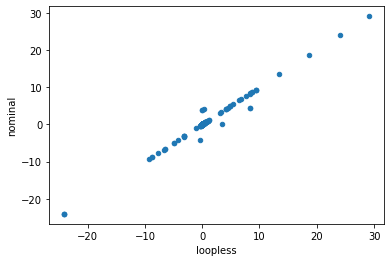

In [4]:
df.plot.scatter(x='loopless', y='nominal')

This functionality can also be used in FVA by using the `loopless=True` argument to avoid getting high flux ranges for reactions that essentially only can reach high fluxes if they are allowed to participate in loops (see the simulation notebook) leading to much narrower flux ranges.

## Loopless model

Cobrapy also includes the "classical" loopless formulation by [Schellenberger et. al.](https://dx.doi.org/10.1016%2Fj.bpj.2010.12.3707) implemented in `cobra.flux_analysis.add_loopless` modify the model with additional mixed-integer constraints that make thermodynamically infeasible loops impossible. This is much slower than the strategy provided above and should only be used if one of the two following cases applies:

1. You want to combine a non-linear (e.g. quadratic) objective with the loopless condition
2. You want to force the model to be infeasible in the presence of loops independent of the set reaction bounds.

We will demonstrate this with a toy model which has a simple loop cycling A $\rightarrow$ B $\rightarrow$ C $\rightarrow$ A, with A allowed to enter the system and C allowed to leave. A graphical view of the system is drawn below:

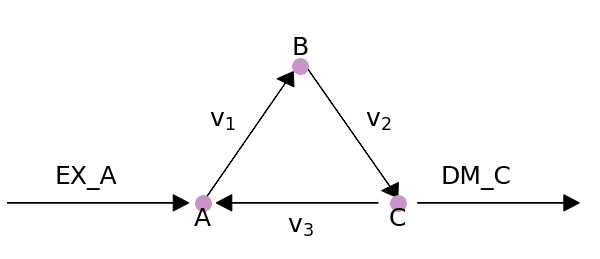

In [5]:
plot_helper.plot_loop()

In [6]:
model = Model()
model.add_metabolites([Metabolite(i) for i in "ABC"])
model.add_reactions([Reaction(i) for i in ["EX_A", "DM_C", "v1", "v2", "v3"]])

model.reactions.EX_A.add_metabolites({"A": 1})
model.reactions.DM_C.add_metabolites({"C": -1})

model.reactions.v1.add_metabolites({"A": -1, "B": 1})
model.reactions.v2.add_metabolites({"B": -1, "C": 1})
model.reactions.v3.add_metabolites({"C": -1, "A": 1})

model.objective = 'DM_C'

While this model contains a loop, a flux state exists which has no flux through reaction v$_3$, and is identified by loopless FBA.

In [7]:
with model:
    add_loopless(model)
    solution = model.optimize()
print("loopless solution: status = " + solution.status)
print("loopless solution flux: v3 = %.1f" % solution.fluxes["v3"])

loopless solution: status = optimal
loopless solution flux: v3 = 0.0


If there is no forced flux through a loopless reaction, parsimonious FBA will also have no flux through the loop.

In [8]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("loopless solution flux: v3 = %.1f" % solution.fluxes["v3"])

parsimonious solution: status = optimal
loopless solution flux: v3 = 0.0


However, if flux is forced through v$_3$, then there is no longer a feasible loopless solution, but the parsimonious solution will still exist.

In [9]:
model.reactions.v3.lower_bound = 1
with model:
    add_loopless(model)
    try:
        solution = model.optimize()
    except:
        print('model is infeasible')

/Users/uridavidakavia/PycharmProjects/cobrapy/src/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [10]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("loopless solution flux: v3 = %.1f" % solution.fluxes["v3"])

parsimonious solution: status = optimal
loopless solution flux: v3 = 1.0


## Method

`loopless_solution` is based on a given reference flux distribution. It will look for a new flux distribution with the following requirements:

1. The objective value is the same as in the reference fluxes.
2. All exchange fluxes have the same value as in the reference distribution.
3. All non-exchange fluxes have the same sign (flow in the same direction) as the reference fluxes.
4. The sum of absolute non-exchange fluxes is minimized.

As proven in the [original publication](http://dx.doi.org/10.1093/bioinformatics/btv096) this will identify the "least-loopy" solution closest to the reference fluxes.

If you are using `add_loopless` this will use the method [described here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3030201/). In summary, it will add $G \approx \Delta G$ proxy variables and make loops thermodynamically infeasible. This is achieved by the following formulation.

$$
\begin{eqnarray}
&\text{maximize } v_{obj} \\
s.t. & Sv = 0\\
& lb_j \leq v_j \leq ub_j \\
& -M\cdot (1 - a_i) \leq v_i \leq M\cdot a_i\\
& -1000a_i + (1 - a_i) \leq G_i \leq -a_i + 1000(1 - a_i)\\
& N_{int}G = 0\\
& a_i \in \{0, 1\}
\end{eqnarray}
$$

Here the index j runs over all reactions and the index i only over internal ones. $a_i$ are indicator variables which equal one if the reaction flux flows in hte forward direction and 0 otherwise. They are used to force the G proxies to always carry the opposite sign of the flux (as it is the case for the "real" $\Delta G$ values). $N_{int}$ is the nullspace matrix for internal reactions and is used to find thermodinamically "correct" values for G. 
